# <font face="garamond" size="18" color="#122DAC">***Instrumental Variables***</font>
## <font face="garamond" size="6" color="#122DAC">*Econ 430*</font>

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import random; random.seed(10) # pre-setting seed
from scipy import stats
# from scipy.stats import norm, chi2, f

# For model fitting
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf

# For instrumental variables
from linearmodels import IV2SLS, IVGMM # also has IVGMMCUE, IVLIML
# from statsmodels.sandbox.regression import gmm # would use IV2SLS, IVGMM


# # For R kernel
# # Note: need working copy of R, initiate chunk with `%%R`
# import rpy2.ipython
# %load_ext rpy2.ipython

*For advanced IV examples: https://github.com/bashtage/linearmodels/blob/main/examples/iv_advanced-examples.ipynb*

# <font face="garamond" size="14" color="#122DAC">1. Linear Regression with Random *x*'s</font>

The key of this chapter: Relax the assumption that the variable $x$ is not
random.

Modified Simple Regression Assumptions:

1. $y_{i}=\beta _{1}+\beta _{2}x_{i}+e_{i}$ correctly describes the relationship between $y_{i}$ and $x_{i}$ in the population, where $\beta_{1}$ and $\beta_{2}$ are unknown (fixed) parameters and $e_i$ is an unobservable random error term.
2. The data pairs $(x_{i},y_{i})$, $i=1,\ldots , N$, are obtained by *random sampling*. That is, the data pairs are collected from the same population, by a process in which each pair is independent of every other pair. Such data are said to be independent and identically distributed (*iid*).
3. The expected value of the error term $e$, *conditional* on the value of $x$, is zero.

    * If $E(e|x)=0$, then we can show that it is also true that $x$ and $e$ are uncorrelated, and that $\text{Cov}(x,e)=0$. Explanatory variables that *are not* correlated with the error term are called *exogenous variables*.
    * Conversely, if $x$ and $e$ are correlated, then $\text{Cov}(x,e)\neq 0$ and we can show that $E(e|x)\neq 0$. Explanatory variables that *are* correlated with the error term are called *endogenous variables*.

4. In the sample, $x$ must take at least two different values.
5. $\text{Var}(e|x)=\sigma ^{2}$. The variance of the error term, conditional on any $x$, is a constant $\sigma ^{2}$.
6. The distribution of the error term is normal.

---

* Assumption 2 states that both $y$ and $x$ are obtained by a sampling process, and thus are random. This is the only one new assumption on our list.
* The result that under the classical assumptions, and fixed $x$'s, the least squares estimator is the best linear unbiased estimator, is a finite sample, or a small sample. This means is that the result does not depend on the size of the sample.

* Under assumptions 1-6:

    1. The least squares estimator is unbiased.
    2. The least squares estimator is the best linear unbiased estimator of the regression parameters, and the usual estimator of $\sigma ^{2}$ is unbiased.
    3. The distributions of the least squares estimators, conditional upon the $x$'s, are normal, and their variances are estimated in the usual way.
    4. The usual interval estimation and hypothesis testing procedures are valid.


* If $x$ is random, as long as the data are obtained by random sampling and the other usual assumptions hold, no changes in our regression methods are required.

* For the purposes of a  "large sample" analysis of the least squares estimator, it is convenient to replace assumption 3 by:

    (3) $E(e)=0$ and $\text{Cov}(x,e)=0$.


Now we can state that under assumptions 1, 2, (3), 4, and 5, the least squares estimators:

1. Are consistent.

    They converge in probability to the true parameter values as $N\rightarrow \infty$.

2. Have approximate normal distributions in large samples, whether the errors are normally distributed or not.

    Our usual interval estimators and test statistics are valid, if the sample is large.

3. If assumption (3) is not true, and in particular if $\text{Cov}(x,e)\neq 0$ so that $x$ and $e$ are correlated, then the least squares estimators are inconsistent.

    They do not converge to the true parameter values even in very large samples.

    None of our usual hypothesis testing or interval estimation procedures are valid.

* The statistical consequences of correlation between $x$ and $e$ is that the least squares estimator is biased---and this bias will not disappear no matter how large the sample.

* Consequently the least squares estimator is inconsistent when there is correlation between $x$ and $e$.

<img src="images/L3_fig1.jpg" alt="(a) Correlated predictor and errors; (b) plot of data, true and fitted regression functions" width="400">

# <font face="garamond" size="14" color="#122DAC">2. Cases in which *x* and *e* are Correlated</font>

* When an explanatory variable and the error term are correlated, the explanatory variable is said to be endogenous.

    This term comes from simultaneous equations models: It means *"determined within the system."*

* Using this terminology when an explanatory variable is correlated with the regression error, one is said to have an *"endogeneity problem."*

* The errors-in-variables problem occurs when an explanatory variable is measured with error.

* If we measure an explanatory variable with error, then it is correlated with the error term, and the least squares estimator is inconsistent.

---

**Example:**

* Let $y$ = annual savings, and let $x^{\ast }$ = the permanent annual income of a person.

* A simple regression model is:
$$
y_{i}=\beta _{1}+\beta _{2}x_{i}^{*}+v_{i}  
$$

* Current income ($x_i$) is a measure of permanent income, but it does not measure permanent income exactly. It is sometimes called a *proxy variable*.

* To capture this feature, let $u_i =$ random disturbance, and define:
$$
x_{i}=x_{i}^{\ast }+u_{i}  
$$


* Substituting $x_{i}^{\ast }$ from 2 into 1:

\begin{align*}
y_{i} &=\beta_{1}+\beta _{2}x_{i}^{\ast }+v_{i}  \\
&=\beta_{1}+\beta _{2}\left( x_{i}-u_{i}\right) +v_{i} \\
&=\beta_{1}+\beta _{2}x_{i}+\left( v_{i}-\beta _{2}u_{i}\right) \\
&=\beta_{1}+\beta _{2}x_{i}+e_{i}
\end{align*}

* In order to estimate Eq. 3 by least squares, we must determine whether or not $x$ is uncorrelated with the random disturbance $e$.

* The covariance between these two random variables, using the fact that $E(e)=0$, is:

\begin{align*}
\text{Cov}\left(x,e\right) &=E\left( xe\right) =E\left[ \left( x^{*}+u\right)
\left( v-\beta _{2}u\right) \right]   \\
&=E\left[ -\beta _{2}u^{2}\right] \\
&=-\beta _{2}\sigma _{u}^{2} \\
&\neq 0
\end{align*}

* The least squares estimator $b_2$ is an *inconsistent* estimator of $\beta_{2}$ because of the correlation between the explanatory variable and the error term.

* Consequently, $b_{2}$ does not converge to $\beta _{2}$ in large samples (even very large samples).

* In large or small samples $b_{2}$ is *not* approximately normal with mean $\beta _{2}$ and variance:
$$
Var\left( b_{2}\right) =\frac{\sigma ^{2}}{\sum_{i}\left( x_{i}-\overline{x}
\right) ^{2}}
$$

## 2.1 Simultaneous Regression Model

* Another situation in which an explanatory variable is correlated with the regression error term arises in simultaneous equations models (e.g., consider a supply and demand model where the equilibrium price and quantity are estimated simultaneously).

* Suppose we write:
$$
Q=\beta _{1}+\beta _{2}P+e  
$$

* There is a feedback relationship between $P$ and $Q$.
* Because of this, which results because price and quantity are jointly, or simultaneously, determined, we can show that $\text{Cov}(P,e)\neq 0$.
* The resulting bias (and inconsistency) is called the *simultaneous equations bias*.
* When an omitted variable is correlated with an included explanatory variable, then the regression error will be correlated with the explanatory variable, making it endogenous.
* Consider a log-linear regression model explaining observed hourly wage:
\begin{align*}
\ln \left( WAGE\right) =&\ \beta _{1}+\beta _{2}EDUC+\beta _{3}EXPER \\
&+\beta _{4}EXPER^{2}+e
\end{align*}

* **Q:** What else affects wages? What have we omitted?
* **A:** Ability
* We might expect $\text{Cov}(EDUC,e)\neq 0$.
* If this is true, then we can expect that the least squares estimator of the returns to another year of education will be positively biased, $ E(b_{2})>\beta_{2}$, and inconsistent.
* The bias will not disappear even in very large samples.
* Estimating our wage equation, we have:
\begin{align*}
\underset{(se)}{\ln(WAGE)} =&\ \underset{(0.1986)}{-0.522} +\ \underset{(0.0141)}{0.1075EDUC} + \underset{(0.0132)}{0.0416EXPER} \\
&\ \underset{(0.0004)}{-0.0008EXPER^2}
\end{align*}

* We estimate that for an additional year of education we expect wages to increase by  approximately 10.75\%, holding everything else constant.
* If ability has a positive effect on wages, then this estimate is overstated, as the contribution of ability is attributed to the education variable.

                            OLS Regression Results                            
Dep. Variable:           np.log(wage)   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     26.29
Date:                Sun, 27 Oct 2024   Prob (F-statistic):           1.30e-15
Time:                        15:01:17   Log-Likelihood:                -431.60
No. Observations:                 428   AIC:                             871.2
Df Residuals:                     424   BIC:                             887.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.5220      0.199     -2.628

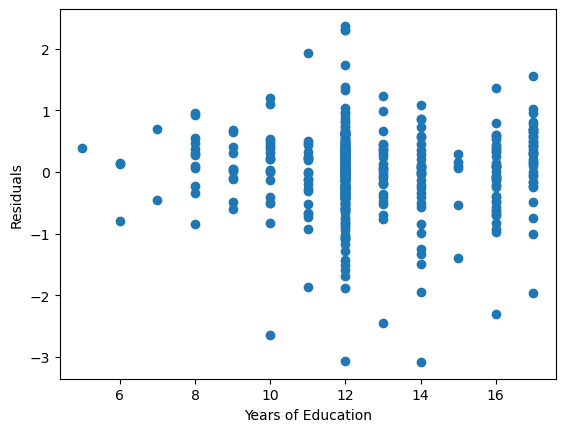

In [2]:
mroz = pd.read_csv('data/mroz.csv')
mroz1 = mroz[mroz['lfp'] == 1] # lpf = 1 if woman worked in 1975, else = 0

# Baseline model
mroz_mod = smf.ols('np.log(wage) ~ educ + exper + I(exper**2)', data=mroz1).fit()
print(mroz_mod.summary())

plt.scatter(x=mroz1['educ'], y=mroz_mod.resid)
plt.ylabel('Residuals')
plt.xlabel('Years of Education')
plt.show()

In [3]:
# Consider the case where we included mother's years of education
mroz_mod2 = smf.ols('np.log(wage) ~ educ + exper + I(exper**2) + mothereduc', data=mroz1).fit()
print(mroz_mod2.summary())

                            OLS Regression Results                            
Dep. Variable:           np.log(wage)   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     20.55
Date:                Sun, 27 Oct 2024   Prob (F-statistic):           1.73e-15
Time:                        15:01:17   Log-Likelihood:                -430.10
No. Observations:                 428   AIC:                             870.2
Df Residuals:                     423   BIC:                             890.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.4702      0.200     -2.346

# <font face="garamond" size="14" color="#122DAC">3. Estimators Based on the Method of Moments</font>

* When all the usual assumptions of the linear model hold, the method of moments leads to the least squares estimator.
* If $x$ is random and *correlated* with the error term, the method of moments leads to an alternative method, called *instrumental variables* estimation, or two-stage least squares (2SLS) estimation, that will work in large samples.
* The $k$-th moment of a random variable $Y$ is the expected value of the random variable raised to the $k$-th power:
\begin{equation}
E\left( Y^{k}\right) =\mu _{k}=k\text{-th moment of }Y 
\end{equation}
* The $k$-th population moment in (1) can be estimated consistently using the sample (of size $N$) analog: 
$$
\widehat{E}\left( Y^{k}\right) =\widehat{\mu }_{k}=k\text{-th sample moment of }Y=\frac{1}{N}\sum_{i}y_{i}^{k}  
$$

* The method of moments estimation procedure equates $m$ population moments to $m$ sample moments to estimate $m$ unknown parameters.

---

**Example:**

$$
Var\left( Y\right) =\sigma ^{2}=E\left[ \left( Y-\mu \right) ^{2}\right]=E\left( Y^{2}\right) -\mu ^{2}  
$$

* The first two population and sample moments of $Y$ are:
\begin{align*}
&\text{Population Moments} && \phantom{---} \text{Sample Moments} \\ 
&E\left( Y\right) =\mu _{1}=\mu && \phantom{---} \widehat{\mu }=\frac{1}{N} \sum_{i}y_{i} \\ 
&E\left( Y^{2}\right) =\mu _{2} && \phantom{---} \widehat{\mu }_{2}=\frac{1}{N} \sum_{i}y_{i}^{2}
\end{align*}

* Solve for the unknown mean and variance parameters: $$\widehat{\mu }=\frac{1}{N}\sum_{i}y_{i}=\overline{y}$$ and $$\widehat{\sigma }^{2}=\widehat{\mu }_{2}-\widehat{\mu }^{2} =\frac{1}{N} \sum_{i}y_{i}^{2}-\overline{y}^{2}=\frac{1}{N}\sum_{i}\left( y_{i}-\overline{y}\right) ^{2}$$

* In the linear regression model we have 
$$
y=\beta _{1}+\beta _{2}x+e,
$$

* We usually assume:
\begin{equation} \tag{2}
E\left( e_{i}\right) =0\Longrightarrow E\left( y_{i}-\beta _{1}-\beta
_{2}x_{i}\right) =0  
\end{equation}

* If $x$ is fixed, or random but not correlated with $e$, then:
$$
E\left( x_{i}e_{i}\right) =0\Longrightarrow E\left( y_{i}-\beta _{1}-\beta_{2}x_{i}\right) x_{i}=0  
$$

* We have two equations with two unknown parameters:
\begin{align*}
\frac{1}{N}\sum_{i}\left( y_{i}-b_{1}-b_{2}x_{i}\right) \phantom{.} &= \phantom{.} 0 \\
\frac{1}{N}\sum_{i}\left( y_{i}-b_{1}-b_{2}x_{i}\right) x_{i} \phantom{.} &= \phantom{.} 0
\end{align*}

* These are equivalent to the least squares normal equations and their solution is:
\begin{align*}
b_{2} &=\frac{\sum_{i}\left( x_{i}-\overline{x}\right) \left( y_{i}-\overline{y}\right) }{\sum_{i}\left( x_{i}-\overline{x}\right) ^{2}} \\
b_{1} &=\overline{y}-b_{2}\overline{x}
\end{align*}

* Under "nice" assumptions, the method of moments principle of estimation leads us to the same estimators for the simple linear regression model as the least squares principle.
* Suppose that there is another variable, $z$, such that:

1. $z$ does not have a direct effect on $y$, and thus, it does not belong on the right-hand side of the model as an explanatory variable.
2. $z$ is not correlated with the regression error term $e$.
3. Variables with this property are said to be \emph{exogenous variables}.
4. $z$ is strongly (or at least not weakly) correlated with $x$, the endogenous explanatory variable.

* A variable $z$ with these 4 properties is called an *instrumental variable*.


* If such a variable $z$ exists, then it can be used to form the moment condition:
\begin{equation} \tag{3}
E\left( ze\right) =0
\Longrightarrow E\left[ z\left( y-\beta _{1}-\beta_{2}x\right) \right] =0  
\end{equation}


* Use equations (2) and (3), the sample moment conditions are:
\begin{align*}
\frac{1}{N}\sum_{i}\left( y_{i}-\widehat{\beta }_{1}-\widehat{\beta }
_{2}x_{i}\right) &=0   \\
\frac{1}{N}\sum_{i}\left( y_{i}-\widehat{\beta }_{1}-\widehat{\beta }
_{2}x_{i}\right) z_{i} &=0
\end{align*}

* Solving these equations leads us to the method of moments estimators, which are also called, in this case, the *instrumental variable (IV) estimators*:
\begin{align*}
\widehat{\beta }_{2}
&=\frac{N\sum_{i}z_{i}y_{i}-\sum_{i}z_{i}\sum_{i}y_{i}}{N\sum_{i}z_{i}x_{i}-\sum_{i}z_{i}\sum_{i}x_{i}}   \\
&=\frac{\sum_{i}\left( z_{i}-\overline{z}\right) \left( y_{i}-\overline{y} \right) }{\sum_{i}\left( z_{i}-\overline{z}\right) \left( x_{i}-\overline{x}\right) } \\
\widehat{\beta }_{2} &=\overline{y}-\widehat{\beta }_{2}\overline{x}
\end{align*}

## 3.1 Properties of the New Estimators

* They are consistent, if $z$ is exogenous, with $E(ze)=0$.
* In large samples the instrumental variable estimators have approximate normal distributions.
* In the simple regression model:
$$
\widehat{\beta }_{2}\sim N\left( \beta _{2},\frac{\sigma ^{2}}{r_{zx}^{2}\sum_{i}\left( x_{i}-\overline{x}\right) ^{2}}\right)  
$$

* The error variance is estimated using the estimator:
$$
\widehat{\sigma }_{IV}^{2}=\frac{1}{N-2}\sum_{i}\left( y_{i}-\widehat{\beta }_{1}-\widehat{\beta }_{2}x_{i}\right) ^{2}
$$

* Note that we can write the variance of the instrumental variables estimator of $\beta _{2}$ as:%
$$
Var\left( \widehat{\beta }_{2}\right)
=\frac{\sigma ^{2}}{r_{zx}^{2}\sum_{i}\left( x_{i}-\overline{x}\right) ^{2}}
=\frac{Var\left(b_{2}\right) }{r_{zx}^{2}}
$$

* Because $r_{zx}^{2}<1$ the variance of the instrumental variables estimator will always be larger than the variance of the least squares estimator, and thus it is said to be less efficient.



* To extend our analysis to a more general setting, consider the multiple regression model:
$$
y=\beta _{1}+\beta _{2}x_{2}+\cdots +\beta _{K}x_{K}+e
$$

* Let $x_{K}$ be an endogenous variable correlated with the error term.
* The first $K-1$ variables are exogenous variables that are uncorrelated with the error term $e$--they are called the *"included"* instruments.
* We can estimate this equation in two steps with a least squares estimation in each step.



* The ***first stage regression*** has the endogenous variable $x_{K}$ on the left-hand side, and *all exogenous and instrumental variables* on the right-hand side.

* The first stage regression is:
$$
x_{K}=\gamma _{1}+\gamma _{2}x_{2}+\cdots \gamma_{K-1}x_{K-1}+\theta _{1}z_{1}+\cdots +\theta _{L}z_{L}+v_{K} 
$$

* The least squares fitted value is:%
$$
\widehat{x}_{K}=\widehat{\gamma }_{1}+\widehat{\gamma }_{2}x_{2}+\cdots \widehat{\gamma }_{K-1}x_{K-1}+\widehat{\theta }_{1}z_{1}+\cdots +\widehat{\theta }_{L}z_{L}  
$$

* The ***second stage regression*** is based on the original specification:
$$
y=\beta _{1}+\beta _{2}x_{2}+\cdots +\beta _{K}\widehat{x}_{K}+e^{*} 
$$

* The least squares estimators from this equation are the *instrumental variables (IV)* estimators.

* Because they can be obtained by two least squares regressions, they are also popularly known as the *two-stage least squares (2SLS)* estimators.

* The IV/2SLS estimator of the error variance is based on the residuals from the original model:
$$
\widehat{\sigma }_{IV}^{2}
=\frac{\sum_{i}\left( y-\widehat{\beta }_{1}+\widehat{\beta }_{2}x_{2}-\cdots-\widehat{\beta}_{K}x_{K}\right) ^{2}}{N-K}  
$$

* In the simple regression, if $x$ is endogenous and we have $L$ instruments:
$$
\widehat{x}=\widehat{\gamma }_{1}+\widehat{\theta }_{1}z_{1}+\cdots +\widehat{\theta}_{L}z_{L}
$$

* The two sample moment conditions are:
\begin{align*}
\frac{1}{N}\sum_{i}\left( y_{i}-\widehat{\beta }_{1}-\widehat{\beta }_{2}x_{i}\right) &=0 \\
\frac{1}{N}\sum_{i}\left( y_{i}-\widehat{\beta }_{1}-\widehat{\beta }_{2}x_{i}\right) \widehat{x}_{i} &=0
\end{align*}


* Solving using the fact that $\overline{\widehat{x}}=\overline{x}$, we get:
\begin{align*}
\widehat{\beta_2}
&= \frac{\sum_i\left(\hat x_i - \overline{\hat x}\right)(y_i-\bar y)}
{\sum_i\left(\hat x_i - \overline{\hat x}\right)(x_i-\bar x)} \\
\widehat{\beta_1}&= \bar y - \widehat{\beta_2}\bar x
\end{align*}

* Sometimes we have more instrumental variables at our disposal than are necessary.
* Suppose we have $L=2$ instruments, $z_{1}$ and $z_{2}$.
* Then we have:
$$
E\left( z_{2}e\right) =E\left[ z_{2}\left( y-\beta _{1}-\beta _{2}x\right)\right] =0
$$

* We have three sample moment conditions:
\begin{align*}
&\frac1N\sum_i\left(y_i - \widehat{\beta_1}-\widehat{\beta_2}x_i\right) &&= \widehat m_1 = 0 \\
&\frac1N\sum_i\left(y_i - \widehat{\beta_1}-\widehat{\beta_2}x_i\right)z_{i1} &&= \widehat m_2 = 0 \\
&\frac1N\sum_i\left(y_i - \widehat{\beta_1}-\widehat{\beta_2}x_i\right)z_{i2} &&= \widehat m_3 = 0
\end{align*}

* The first stage regression is a key tool in assessing whether an instrument is "strong" or "weak" in the multiple regression setting.
* Suppose the first stage regression equation is:
$$
x_{K}=\gamma _{1}+\gamma _{2}x_{2}+\cdots +\gamma_{K-1}x_{K-1}+\theta _{1}z_{1}+v_{K}  
$$

* The key to assessing the strength of the instrumental variable $z_{1}$ is the strength of its relationship to $x_{K}$ after controlling for the effects of all the other exogenous variables.

* Suppose the first stage regression equation is:
$$
x_{K}=\gamma _{1}+\gamma _{2}x_{2}+\cdots +\gamma_{K-1}x_{K-1}+\theta _{1}z_{1}+\cdots \theta _{L}z_{L}+v_{K} 
$$

* We require that *at least* one of the instruments be strong.

---

**Example:**

*Wage Equation with IV = mother's years of education.*

* Consider the model with an instrumental variable $MOTHEREDUC$:
\begin{align*}
\underset{(se)}{\widehat{EDUC}}
&= \underset{(0.4249)}{9.7751} + \underset{(0.0427)}{0.0489}EXPER - \underset{(0.0012)}{0.0013}EXPER^2 \\
&\phantom{-}+ \underset{(0.0311)}{0.2677}MOTHEREDUC
\end{align*}

* To implement instrumental variables estimation using the two-stage least squares approach, we obtain the predicted values of education from the first stage equation and insert it into the log-linear wage equation to
replace $EDUC$.
* Then estimate the resulting equation by least squares.


* The instrumental variables estimates of the log-linear wage equation
are:
\begin{align*}
\ln(\underset{(se)}{\widehat{WAGE}})
&= \underset{(0.4729)}{0.1982} + \underset{(0.0374)}{0.0493}EDUC + \underset{(0.0136)}{0.0449}EXPER \\
&\phantom{-}- \underset{(0.0004)}{0.0009}EXPER^2
\end{align*}

* Note: As we can see, the coefficient  of EDUC is now 4.93\% compared to our OLS estimate of 10.75\%.

* Using $FATHEREDUC$, the first stage equation is:
\begin{align*}
EDUC &= \gamma_1 + \gamma_2 EXPER + \gamma_3 EXPER^2 + \theta_1 MOTHEREDUC \\
&\phantom{-}+\theta_2 FATHEREDUC + v_k
\end{align*}


* The IV/2SLS estimates are:
\begin{align*}
\ln(\underset{(se)}{\widehat{WAGE}})
&= \underset{(0.4003)}{0.481} + \underset{(0.0374)}{0.0614}EDUC + \underset{(0.0442)}{0.0136}EXPER \\
&\phantom{-}- \underset{(0.0004)}{0.0009}EXPER^2
\end{align*}

* Note: In this case the coefficient of EDUC is now 6.14\% compared to our OLS estimate of 10.75\%.


* In a multiple regression model, the coefficients are the effect of a unit change in an explanatory, independent, variable on the expected outcome, holding all other things constant.
* In calculus terminology, the coefficients are partial derivatives.

* We can net out or partial out the effects of explanatory variables.
    * Regression coefficients can be thought of measuring the effect of one variable on another after removing, or partialling out, the effects of all other variables.
    * The sample correlation between two residuals is called the *partial correlation* coefficient.
* The multiple regression model, including all $m$ variables, is:

$$
y=
\overset{G\text{ exogenous variables}}{\overbrace{\beta _{1}+\beta_{2}x_{2}+\cdots +\beta _{G}x_{G}}}
+\overset{B\text{ endogenous variables}}{\overbrace{\beta_{G+1}x_{_{G+1}}+\cdots +\beta_{K}x_{K}}}
+e
$$

* Think of $G$ = Good explanatory variables, $B$ = Bad explanatory variables and $L$ = Lucky instrumental variables.
* It is a necessary condition for IV estimation that $L\geq B$.
* If $L=B$ then there are just enough instrumental variables to carry out IV estimation.

    The model parameters are said to *just identified* or *exactly identified* in this case.

* The term identified is used to indicate that the model parameters can be consistently estimated.
* If $L>B$ then we have more instruments than are necessary for IV estimation, and the model is said to be *overidentified*.

* Consider the $B$ first-stage equations: $$x_{G+j}=\gamma _{1j}+\gamma _{2j}x_{2}+\cdots +\gamma_{Gj}x_{G}+\theta _{1j}z_{1}+\cdots +\theta _{Lj}z_{L}+v_{j}, $$ for $j=1,\dots,B$

* The predicted values are:$$\widehat{x}_{G+j}=\widehat{\gamma }_{1j}+\widehat{\gamma }_{2j}x_{2}+\cdots +\widehat{\gamma}_{Gj}x_{G}+\widehat{\theta}_{1j}z_{1}+\cdots +\widehat{\theta }_{Lj}z_{L}$$

* In the second stage of estimation we apply least squares to:
$$
y=\beta _{1}+\beta _{2}x_{2}+\cdots +\beta _{G}x_{G}+\beta _{G+1} \widehat{x}_{_{G+1}}+\cdots +\beta _{K}\widehat{x}_{G+B}+e^{*}
$$


* Consider the model with $B=2$:
$$
y=\beta _{1}+\beta _{2}x_{2}+\cdots +\beta _{G}x_{G}+\beta_{G+1}x_{G+1}+\beta _{G+2}x_{G+2}+e  
$$

* The first-stage equations are:
\begin{align*}
x_{G+1}&    \\
& =\gamma _{11}+\gamma _{21}x_{2}+\cdots +\gamma_{G1}x_{G}+\theta _{11}z_{1}+\theta _{21}z_{2}+v_{1}, \\
x_{G+2}&   \\
& =\gamma _{12}+\gamma _{22}x_{2}+\cdots +\gamma_{G2}x_{G}+\theta _{12}z_{1}+\theta _{22}z_{2}+v_{2}
\end{align*}


* When testing the null hypothesis $H_{0}$: $\beta _{k}=c$, use of the
test statistic $$t=\frac{\left( \widehat{\beta }_{k}-c\right) }{se\left( \widehat{\beta }_{k}\right) }$$ is valid in large samples.
* It is common, but not universal, practice to use critical values, and $p$-values, based on the $t$-distribution rather than the more strictly appropriate $N(0,1)$ distribution.
* The reason is that tests based on the $t$-distribution tend to work
better in samples of data that are not large.

* When testing a joint hypothesis, such as $H_{0}$: $\beta _{2}=c_{2},\ \beta _{3}=c_{3}$, the test may be based on the chi-square distribution with the number of degrees of freedom equal to the number of hypotheses ($J$) being tested.
    * The test itself may be called a "Wald" test, or a likelihood ratio (*LR*) test, or a Lagrange multiplier (*LM*) test
    * These testing procedures are all asymptotically equivalent.


## 3.2 A word on R-squared

* Unfortunately $R^{2}$ can be negative when based on IV estimates.
* Therefore the use of measures like $R^{2}$ outside the context of the least squares estimation should be avoided.

## 3.3 IV in Python

Using the `linearmodels` library, you can specify how to fit the model in two ways. Similar to OLS in `statsmodels`, you can either specify the model formulaically or by passing data frames into the function. To pass the data explicitly:

```python
dependent = data[dependent_var]
exog = sm.add_constant(data[exog_vars])                 # must add constant
endog = data[endogenous_vars]
instruments = data[instruments]

model = IV2SLS(dependent, exog, endog, instruments)
fitted_model = mod.fit(cov_type='unadjusted')           # can specify 'robust' or other corrections
```

With the above method if any one of the arguments is not part of the model (say, endogenous variables), then the argument should be passed `None`. To fit a model based off a formula, it must use the form `dep ~ 1 + exog + [endog ~ instruments]`. Note that `1` adds the constant. We observe the formula method below:

```python
formula = (
    'y ~ 1 + x_2 + ... + x_G + [x_G1 + ... + x_K ~ z_1 + ... + z_L]'
)
model = IV2SLS.from_formula(formula, data)
```

In [4]:
# Again using modified 'mroz' data

# Baseline
mroz_mod3 = smf.ols('np.log(wage) ~ educ + exper + I(exper**2)', data=mroz1).fit()
print(mroz_mod3.summary())

                            OLS Regression Results                            
Dep. Variable:           np.log(wage)   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     26.29
Date:                Sun, 27 Oct 2024   Prob (F-statistic):           1.30e-15
Time:                        15:01:17   Log-Likelihood:                -431.60
No. Observations:                 428   AIC:                             871.2
Df Residuals:                     424   BIC:                             887.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.5220      0.199     -2.628

In [5]:
# One instrument = mother's years of education
f1 = 'np.log(wage) ~ 1 + exper + I(exper**2) + [educ ~ mothereduc]'
mroz_iv1 = IV2SLS.from_formula(f1, data=mroz1).fit(cov_type='robust')
print(mroz_iv1.summary)

                          IV-2SLS Estimation Summary                          
Dep. Variable:           np.log(wage)   R-squared:                      0.1231
Estimator:                    IV-2SLS   Adj. R-squared:                 0.1169
No. Observations:                 428   F-statistic:                    16.662
Date:                Sun, Oct 27 2024   P-value (F-stat)                0.0008
Time:                        15:01:17   Distribution:                  chi2(3)
Cov. Estimator:                robust                                         
                                                                              
                              Parameter Estimates                              
             Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------
Intercept       0.1982     0.4869     0.4071     0.6840     -0.7560      1.1524
exper           0.0449     0.0155     2.8882    

In [6]:
# One instrument = father's years of education
f2 = 'np.log(wage) ~ 1 + exper + I(exper**2) + [educ ~ fathereduc]'
mroz_iv2 = IV2SLS.from_formula(f2, data=mroz1).fit(cov_type='robust')
print(mroz_iv2.summary)

                          IV-2SLS Estimation Summary                          
Dep. Variable:           np.log(wage)   R-squared:                      0.1430
Estimator:                    IV-2SLS   Adj. R-squared:                 0.1370
No. Observations:                 428   F-statistic:                    19.229
Date:                Sun, Oct 27 2024   P-value (F-stat)                0.0002
Time:                        15:01:17   Distribution:                  chi2(3)
Cov. Estimator:                robust                                         
                                                                              
                              Parameter Estimates                              
             Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------
Intercept      -0.0611     0.4560    -0.1340     0.8934     -0.9548      0.8326
exper           0.0437     0.0155     2.8187    

In [7]:
# Two instruments = father's and mother's years of education
f3 = 'np.log(wage) ~ 1 + exper + I(exper**2) + [educ ~ mothereduc + fathereduc]'
mroz_iv3 = IV2SLS.from_formula(f3, data=mroz1).fit(cov_type='robust')
print(mroz_iv3.summary)

                          IV-2SLS Estimation Summary                          
Dep. Variable:           np.log(wage)   R-squared:                      0.1357
Estimator:                    IV-2SLS   Adj. R-squared:                 0.1296
No. Observations:                 428   F-statistic:                    18.611
Date:                Sun, Oct 27 2024   P-value (F-stat)                0.0003
Time:                        15:01:17   Distribution:                  chi2(3)
Cov. Estimator:                robust                                         
                                                                              
                              Parameter Estimates                              
             Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------
Intercept       0.0481     0.4278     0.1124     0.9105     -0.7903      0.8865
exper           0.0442     0.0155     2.8546    

# <font face="garamond" size="14" color="#122DAC">4. Specification Tests</font>

To start, the first test we should do is the "weak instrument" test. We want our instruments to be strongly correlated with the endogenous variable(s); as a result, a large F-statistic of the first-stage regression indicates good strength. As a rule of thumb, instruments are weak if the first-stage F-statistic is less than 10, otherwise the instruments are strong, and we can proceed.

Now let's look at the other tests one might perform.

1. Can we test for whether $x$ is correlated with the error term? If we can it might give us a guide of when to use least squares and when to use IV estimators.
2. Can we test if our instrument is valid, and uncorrelated with the regression error, as required?

* The null hypothesis is $H_{0}$: $Cov(x,e)=0$ against the alternative $H_{1}$: $Cov(x,e)\neq 0$
* If null hypothesis is true, then both the least squares estimator and the instrumental variables estimator are consistent.
* If the null hypothesis is false, the least squares estimator is not consistent, and the instrumental variables estimator is consistent.
* Comments:
    * Naturally if the null hypothesis is true, then one should use the more efficient estimator, which is the least squares estimator.
    * If the null hypothesis is not true, then the only consistent estimator is the instrumental variables estimator.
* There are several forms of the test, usually called the *Hausman test*.

## Hausman test - Step 1

* Consider the model:
$$
y=\beta _{1}+\beta _{2}x+e
$$
* Let $z_{1}$ and $z_{2}$ be instrumental variables for $x$.
* Estimate the regression model $$x=\gamma _{1}+\theta _{1}z_{1}+\theta _{2}z_{2}+v$$ by least squares, and obtain the residuals
$$
\widehat{v}=x-\widehat{\gamma }_{1}+\widehat{\theta }_{1}z_{1}+\widehat{\theta }_{2}z_{2}+
$$

* If there are more than one explanatory variables that are being tested for endogeneity, repeat this estimation for each one, using all available instrumental variables in each regression. 

## Hausman test - Step 2

* Include the residuals computed in step 1 as an explanatory variable in the original regression,
$$
y=\beta _{1}+\beta _{2}x+\delta \widehat{v}+e
$$

* Estimate this "artificial regression" by least squares, and employ the usual $t$-test for the hypothesis of significance
\begin{align*}
H_0&:\phantom{-} \delta=0\phantom{-} \text{i.e., no correlation between }x\text{ and }e \\
H_1&:\phantom{-} \delta\neq0\phantom{-} \text{i.e., correlation between }x\text{ and }e
\end{align*}

## Hausman test - Step 3

* Note that if more than one variable is being tested for endogeneity, the test will be an $F$-test of joint significance of the coefficients on the included residuals.


## A test of the validity of the surplus moment conditions:

* **Step 1:** Compute the IV estimates $\widehat{\beta }_{k}$ using all available instruments, including the $G$ variables, $x_{1}=1,x_{2},\ldots ,x_{G}$, that are presumed to be exogenous, and the $L$ instruments.

* **Step 2:** Obtain the residuals
$$
\widehat{e}=y-\widehat{\beta }_{1}-\widehat{\beta }_{2}x_{2}-\cdots -\widehat{\beta }_{K}x_{K}
$$

* **Step 3:** Regress $\widehat{e}$ on all the available instruments described in step 1.


* **Step 4:** Compute $N\times R^{2}$ from this regression, where $N$ is the sample size and $R^{2}$ is the usual goodness-of-fit measure.

* **Step 5:** If all of the surplus moment conditions are valid, then $$N\times R^{2}\sim \chi _{\left( L-B\right) }^{2}$$ If the value of the test statistic exceeds the $100(1-\alpha)$-percentile from the $\chi _{\left( L-B\right) }^{2}$ distribution, then we conclude that at least one of the surplus moment conditions restrictions is not valid.

In [8]:
# Two instruments: mother's and father's years of education
f4 = 'np.log(wage) ~ 1 + exper + I(exper**2) + [educ ~ mothereduc + fathereduc]'
mroz_iv4 = IV2SLS.from_formula(f4, data=mroz1).fit(cov_type='unadjusted')
print(mroz_iv4.summary)

                          IV-2SLS Estimation Summary                          
Dep. Variable:           np.log(wage)   R-squared:                      0.1357
Estimator:                    IV-2SLS   Adj. R-squared:                 0.1296
No. Observations:                 428   F-statistic:                    24.653
Date:                Sun, Oct 27 2024   P-value (F-stat)                0.0000
Time:                        15:01:17   Distribution:                  chi2(3)
Cov. Estimator:            unadjusted                                         
                                                                              
                              Parameter Estimates                              
             Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------
Intercept       0.0481     0.3985     0.1207     0.9039     -0.7329      0.8291
exper           0.0442     0.0134     3.3038    

In [9]:
# First stage results (for weak instruments test)

print(mroz_iv4.first_stage)
# H0: instruments are weak (cutoff is 10)
# H1: at least one instrument is strong

### RESULT: partial F-statistic = 56.055 > 10, reject H0

    First Stage Estimation Results    
                                  educ
--------------------------------------
R-squared                       0.2115
Partial R-squared               0.2076
Shea's R-squared                0.2076
Partial F-statistic             56.055
P-value (Partial F-stat)      1.11e-16
Partial F-stat Distn          F(2,423)
========================== ===========
Intercept                       9.1026
                              (21.465)
exper                           0.0452
                              (1.1302)
I(exper**2)                    -0.0010
                             (-0.8435)
mothereduc                      0.1576
                              (4.4165)
fathereduc                      0.1895
                              (5.6483)
--------------------------------------

T-stats reported in parentheses
T-stats use same covariance type as original model


In [10]:
# Hausman test
print(mroz_iv4.wu_hausman(), '\n----------')
# H0: corr(x, e) = 0
# H1: endogeneity

# Sargan test
print(mroz_iv4.sargan)
# H0: extra instruments are valid (i.e., corr(zi, e) = 0)
# H1: extra instruments are not valid

Wu-Hausman test of exogeneity
H0: All endogenous variables are exogenous
Statistic: 2.8035
P-value: 0.0948
Distributed: F(1,423) 
----------
Sargan's test of overidentification
H0: The model is not overidentified.
Statistic: 0.3781
P-value: 0.5386
Distributed: chi2(1)


#### *Code Example*

In [11]:
# Example: Cigarette consumption (data from 1995)

# P = is the after-tax average real price per pack of cigarettes in state
# Q = number of cigarette packs per capita sold
# Income = real per capita income

cig = pd.read_csv('data/cigarettesSW.csv')
cig['rincome'] = cig['income'] / cig['population'] / cig['cpi']     # real income
cig['rprice'] = cig['price'] / cig['cpi']                           # real price
cig['salestax'] = (cig['taxs'] - cig['tax']) / cig['cpi']           # real sales tax
cig['cigtax'] = cig['tax'] / cig['cpi']                             # real cigarette tax

c1995 = cig.copy()[cig['year'] == 1995]     # subset to year = 1995
c1995.reset_index(drop=True, inplace=True)

In [12]:
# Estimate model w/ IV = 'salestax'
cig_m0 = smf.ols('np.log(packs) ~ np.log(rprice) + np.log(rincome) + salestax', data=c1995).fit(cov_type='HC1')
print(cig_m0.summary())

# Check instrument relevance for 'salestax'
print('\ntest: salestax = 0\n', cig_m0.f_test([0, 0, 0, 1]))

                            OLS Regression Results                            
Dep. Variable:          np.log(packs)   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                     13.73
Date:                Sun, 27 Oct 2024   Prob (F-statistic):           1.86e-06
Time:                        15:01:17   Log-Likelihood:                 14.434
No. Observations:                  48   AIC:                            -20.87
Df Residuals:                      44   BIC:                            -13.38
Df Model:                           3                                         
Covariance Type:                  HC1                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          11.3236      1.250     

In [13]:
# Estimate model w/ IV = 'cigtax'
cig_m1 = smf.ols('np.log(packs) ~ np.log(rprice) + np.log(rincome) + cigtax', data=c1995).fit(cov_type='HC1')
print(cig_m1.summary())

# Check instrument relevance for 'cigtax'
print('\ntest: cigtax = 0\n', cig_m1.f_test([0, 0, 0, 1]))

                            OLS Regression Results                            
Dep. Variable:          np.log(packs)   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     13.17
Date:                Sun, 27 Oct 2024   Prob (F-statistic):           2.87e-06
Time:                        15:01:17   Log-Likelihood:                 14.291
No. Observations:                  48   AIC:                            -20.58
Df Residuals:                      44   BIC:                            -13.10
Df Model:                           3                                         
Covariance Type:                  HC1                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          12.8102      2.794     

In [14]:
# Estimate model w/ IV1 = 'salestax', IV2 = 'cigtax'
cig_m2 = smf.ols('np.log(packs) ~ np.log(rprice) + np.log(rincome) + salestax + cigtax', data=c1995).fit(cov_type='HC1')
print(cig_m2.summary())

# Check instrument relevance for 'salestax', 'cigtax'
print('\ntest: salestax = 0, cigtax = 0 \n', cig_m2.f_test([[0, 0, 0, 1, 0],
                                                            [0, 0, 0, 0, 1]]))

                            OLS Regression Results                            
Dep. Variable:          np.log(packs)   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.425
Method:                 Least Squares   F-statistic:                     12.94
Date:                Sun, 27 Oct 2024   Prob (F-statistic):           5.34e-07
Time:                        15:01:17   Log-Likelihood:                 15.637
No. Observations:                  48   AIC:                            -21.27
Df Residuals:                      43   BIC:                            -11.92
Df Model:                           4                                         
Covariance Type:                  HC1                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          16.2505      3.408     

In [15]:
# Estimate IV model w/ IV1 = 'salestax', IV2 = 'cigtax'

cig_iv = IV2SLS.from_formula('np.log(packs) ~ 1 + np.log(rincome) + [np.log(rprice) ~ salestax]',
                             data=c1995).fit(cov_type='robust')
print(cig_iv.summary)

                          IV-2SLS Estimation Summary                          
Dep. Variable:          np.log(packs)   R-squared:                      0.4189
Estimator:                    IV-2SLS   Adj. R-squared:                 0.3931
No. Observations:                  48   F-statistic:                    17.474
Date:                Sun, Oct 27 2024   P-value (F-stat)                0.0002
Time:                        15:01:17   Distribution:                  chi2(2)
Cov. Estimator:                robust                                         
                                                                              
                                Parameter Estimates                                
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
Intercept           9.4307     1.2194     7.7338     0.0000      7.0407      11.821
np.log(rincome)     0.2145     0

In [16]:
# Test validity of instruments (J-statistic) via
# overidentifying restrictions test

cig_iv_OR = smf.ols('cig_iv.resids ~ np.log(rincome) + salestax + cigtax', data = c1995).fit()

# Perform Wald test, use chi-square distribution
cig_iv_OR_test = cig_iv_OR.wald_test([[0, 0, 1, 0],
                                      [0, 0, 0, 1]], use_f=False, scalar=True)
print('test: salestax = 0, cigtax = 0 \n', cig_iv_OR_test)

test: salestax = 0, cigtax = 0 
 <Wald test (chi2): statistic=0.5553747871542599, p-value=0.7575335943711898, df_denom=2>


# Instrumental Variables Addtional Examples

## (1) Example: Return to Education for Married Women

In [17]:
#Note: You may need to first install install "linearmodels"
# pip install linearmodels

import wooldridge as woo
import numpy as np
import pandas as pd
import linearmodels.iv as iv
import statsmodels.formula.api as smf

mroz = woo.dataWoo('mroz')

# restrict to non-missing wage observations:
mroz = mroz.dropna(subset=['lwage'])

cov_yz = np.cov(mroz['lwage'], mroz['fatheduc'])[1, 0]
cov_xy = np.cov(mroz['educ'], mroz['lwage'])[1, 0]
cov_xz = np.cov(mroz['educ'], mroz['fatheduc'])[1, 0]
var_x = np.var(mroz['educ'], ddof=1)
x_bar = np.mean(mroz['educ'])
y_bar = np.mean(mroz['lwage'])

# OLS slope parameter manually:
b_ols_man = cov_xy / var_x
print(f'b_ols_man: {b_ols_man}\n')

# IV slope parameter manually:
b_iv_man = cov_yz / cov_xz
print(f'b_iv_man: {b_iv_man}\n')
# OLS automatically:
reg_ols = smf.ols(formula='np.log(wage) ~ educ', data=mroz)
results_ols = reg_ols.fit()

# print regression table:
table_ols = pd.DataFrame({'b': round(results_ols.params, 4),
                          'se': round(results_ols.bse, 4),
                          't': round(results_ols.tvalues, 4),
                          'pval': round(results_ols.pvalues, 4)})
print(f'table_ols: \n{table_ols}\n')

# IV automatically:
reg_iv = iv.IV2SLS.from_formula(formula='np.log(wage) ~ 1 + [educ ~ fatheduc]',
                                data=mroz)
results_iv = reg_iv.fit(cov_type='unadjusted', debiased=True)

# print regression table:
table_iv = pd.DataFrame({'b': round(results_iv.params, 4),
                         'se': round(results_iv.std_errors, 4),
                         't': round(results_iv.tstats, 4),
                         'pval': round(results_iv.pvalues, 4)})
print(f'table_iv: \n{table_iv}\n')


b_ols_man: 0.10864865517467513

b_iv_man: 0.05917347999936595

table_ols: 
                b      se       t   pval
Intercept -0.1852  0.1852 -0.9998  0.318
educ       0.1086  0.0144  7.5451  0.000

table_iv: 
                b      se       t    pval
Intercept  0.4411  0.4461  0.9888  0.3233
educ       0.0592  0.0351  1.6839  0.0929



# (2) Example: College Proximity as an IV for Education

In [18]:
import wooldridge as woo
import numpy as np
import pandas as pd
import linearmodels.iv as iv
import statsmodels.formula.api as smf

card = woo.dataWoo('card')

# checking for relevance with reduced form:
reg_redf = smf.ols(
    formula='educ ~ nearc4 + exper + I(exper**2) + black + smsa +'
    'south + smsa66 + reg662 + reg663 + reg664 + reg665 + reg666 +'
    'reg667 + reg668 + reg669', data=card)
results_redf = reg_redf.fit()

# print regression table:
table_redf = pd.DataFrame({'b': round(results_redf.params, 4),
                           'se': round(results_redf.bse, 4),
                           't': round(results_redf.tvalues, 4),
                           'pval': round(results_redf.pvalues, 4)})
print(f'table_redf: \n{table_redf}\n')

# OLS:
reg_ols = smf.ols(
    formula='np.log(wage) ~ educ + exper + I(exper**2) + black + smsa +'
    'south + smsa66 + reg662 + reg663 + reg664 + reg665 +'
    'reg666 + reg667 + reg668 + reg669', data=card)
results_ols = reg_ols.fit()

# print regression table:
table_ols = pd.DataFrame({'b': round(results_ols.params, 4),
                          'se': round(results_ols.bse, 4),
                          't': round(results_ols.tvalues, 4),
                          'pval': round(results_ols.pvalues, 4)})
print(f'table_ols: \n{table_ols}\n')

# IV automatically:
reg_iv = iv.IV2SLS.from_formula(
    formula='np.log(wage)~ 1 + exper + I(exper**2) + black + smsa + '
            'south + smsa66 + reg662 + reg663 + reg664 + reg665 +'
            'reg666 + reg667 + reg668 + reg669 + [educ ~ nearc4]',
    data=card)
results_iv = reg_iv.fit(cov_type='unadjusted', debiased=True)

# print regression table:
table_iv = pd.DataFrame({'b': round(results_iv.params, 4),
                         'se': round(results_iv.std_errors, 4),
                         't': round(results_iv.tstats, 4),
                         'pval': round(results_iv.pvalues, 4)})
print(f'table_iv: \n{table_iv}\n')


table_redf: 
                     b      se        t    pval
Intercept      16.6383  0.2406  69.1446  0.0000
nearc4          0.3199  0.0879   3.6408  0.0003
exper          -0.4125  0.0337 -12.2415  0.0000
I(exper ** 2)   0.0009  0.0017   0.5263  0.5987
black          -0.9355  0.0937  -9.9806  0.0000
smsa            0.4022  0.1048   3.8372  0.0001
south          -0.0516  0.1354  -0.3811  0.7032
smsa66          0.0255  0.1058   0.2409  0.8096
reg662         -0.0786  0.1871  -0.4203  0.6743
reg663         -0.0279  0.1834  -0.1524  0.8789
reg664          0.1172  0.2173   0.5394  0.5897
reg665         -0.2726  0.2184  -1.2481  0.2121
reg666         -0.3028  0.2371  -1.2773  0.2016
reg667         -0.2168  0.2344  -0.9250  0.3550
reg668          0.5239  0.2675   1.9587  0.0502
reg669          0.2103  0.2025   1.0386  0.2991

table_ols: 
                    b      se        t    pval
Intercept      4.6208  0.0742  62.2476  0.0000
educ           0.0747  0.0035  21.3510  0.0000
exper          0.

# Two Stage Least Squares Additional Example

## Example: Return to Education for Married Women

In [20]:
import wooldridge as woo
import numpy as np
import pandas as pd
import linearmodels.iv as iv
import statsmodels.formula.api as smf

mroz = woo.dataWoo('mroz')

# restrict to non-missing wage observations:
mroz = mroz.dropna(subset=['lwage'])

# 1st stage (reduced form):
reg_redf = smf.ols(formula='educ ~ exper + I(exper**2) + motheduc + fatheduc',
                   data=mroz)
results_redf = reg_redf.fit()
mroz['educ_fitted'] = results_redf.fittedvalues

# print regression table:
table_redf = pd.DataFrame({'b': round(results_redf.params, 4),
                           'se': round(results_redf.bse, 4),
                           't': round(results_redf.tvalues, 4),
                           'pval': round(results_redf.pvalues, 4)})
print(f'table_redf: \n{table_redf}\n')

# 2nd stage:
reg_secstg = smf.ols(formula='np.log(wage) ~ educ_fitted + exper + I(exper**2)',
                     data=mroz)
results_secstg = reg_secstg.fit()

# print regression table:
table_secstg = pd.DataFrame({'b': round(results_secstg.params, 4),
                             'se': round(results_secstg.bse, 4),
                             't': round(results_secstg.tvalues, 4),
                             'pval': round(results_secstg.pvalues, 4)})
print(f'table_secstg: \n{table_secstg}\n')

# IV automatically:
reg_iv = iv.IV2SLS.from_formula(
    formula='np.log(wage) ~ 1 + exper + I(exper**2) +'
            '[educ  ~ motheduc + fatheduc]',
    data=mroz)
results_iv = reg_iv.fit(cov_type='unadjusted', debiased=True)

# print regression table:
table_iv = pd.DataFrame({'b': round(results_iv.params, 4),
                         'se': round(results_iv.std_errors, 4),
                         't': round(results_iv.tstats, 4),
                         'pval': round(results_iv.pvalues, 4)})
print(f'table_iv: \n{table_iv}\n')


table_redf: 
                    b      se        t    pval
Intercept      9.1026  0.4266  21.3396  0.0000
exper          0.0452  0.0403   1.1236  0.2618
I(exper ** 2) -0.0010  0.0012  -0.8386  0.4022
motheduc       0.1576  0.0359   4.3906  0.0000
fatheduc       0.1895  0.0338   5.6152  0.0000

table_secstg: 
                    b      se       t    pval
Intercept      0.0481  0.4198  0.1146  0.9088
educ_fitted    0.0614  0.0330  1.8626  0.0632
exper          0.0442  0.0141  3.1361  0.0018
I(exper ** 2) -0.0009  0.0004 -2.1344  0.0334

table_iv: 
                  b      se       t    pval
Intercept    0.0481  0.4003  0.1202  0.9044
exper        0.0442  0.0134  3.2883  0.0011
I(exper**2) -0.0009  0.0004 -2.2380  0.0257
educ         0.0614  0.0314  1.9530  0.0515



# Testing  for Exogeneity of the Regressors Additional Example
## Example: Return to Education for Married Women

In [21]:
import wooldridge as woo
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf

mroz = woo.dataWoo('mroz')

# restrict to non-missing wage observations:
mroz = mroz.dropna(subset=['lwage'])

# 1st stage (reduced form):
reg_redf = smf.ols(formula='educ ~ exper + I(exper**2) + motheduc + fatheduc',
                   data=mroz)
results_redf = reg_redf.fit()
mroz['resid'] = results_redf.resid

# 2nd stage:
reg_secstg = smf.ols(formula='np.log(wage)~ resid + educ + exper + I(exper**2)',
                     data=mroz)
results_secstg = reg_secstg.fit()

# print regression table:
table_secstg = pd.DataFrame({'b': round(results_secstg.params, 4),
                             'se': round(results_secstg.bse, 4),
                             't': round(results_secstg.tvalues, 4),
                             'pval': round(results_secstg.pvalues, 4)})
print(f'table_secstg: \n{table_secstg}\n')


The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
table_secstg: 
                    b      se       t    pval
Intercept      0.0481  0.3946  0.1219  0.9030
resid          0.0582  0.0348  1.6711  0.0954
educ           0.0614  0.0310  1.9815  0.0482
exper          0.0442  0.0132  3.3363  0.0009
I(exper ** 2) -0.0009  0.0004 -2.2706  0.0237



# Testing Overidentifying Restrictions Additional Example
## Example: Return to Education for Married Women

In [23]:
import wooldridge as woo
import numpy as np
import pandas as pd
import linearmodels.iv as iv
import statsmodels.formula.api as smf
import scipy.stats as stats

mroz = woo.dataWoo('mroz')

# restrict to non-missing wage observations:
mroz = mroz.dropna(subset=['lwage'])

# IV regression:
reg_iv = iv.IV2SLS.from_formula(formula='np.log(wage) ~ 1 + exper + I(exper**2) +'
                                        '[educ ~ motheduc + fatheduc]', data=mroz)
results_iv = reg_iv.fit(cov_type='unadjusted', debiased=True)

# print regression table:
table_iv = pd.DataFrame({'b': round(results_iv.params, 4),
                         'se': round(results_iv.std_errors, 4),
                         't': round(results_iv.tstats, 4),
                         'pval': round(results_iv.pvalues, 4)})
print(f'table_iv: \n{table_iv}\n')

# auxiliary regression:
mroz['resid_iv'] = results_iv.resids
reg_aux = smf.ols(formula='resid_iv ~ exper + I(exper**2) + motheduc + fatheduc',
                  data=mroz)
results_aux = reg_aux.fit()

# calculations for test:
r2 = results_aux.rsquared
n = results_aux.nobs
teststat = n * r2
pval = 1 - stats.chi2.cdf(teststat, 1)

print(f'r2: {r2}\n')
print(f'n: {n}\n')
print(f'teststat: {teststat}\n')
print(f'pval: {pval}\n')

table_iv: 
                  b      se       t    pval
Intercept    0.0481  0.4003  0.1202  0.9044
exper        0.0442  0.0134  3.2883  0.0011
I(exper**2) -0.0009  0.0004 -2.2380  0.0257
educ         0.0614  0.0314  1.9530  0.0515

r2: 0.0008833444088024445

n: 428.0

teststat: 0.37807140696744623

pval: 0.5386371981603848



# IV with Panel Data Additional Example
## Example: Job Training and Worker Productivity

In [24]:
import wooldridge as woo
import pandas as pd
import linearmodels.iv as iv

jtrain = woo.dataWoo('jtrain')

# define panel data (for 1987 and 1988 only):
jtrain_87_88 = jtrain.loc[(jtrain['year'] == 1987) | (jtrain['year'] == 1988), :]
jtrain_87_88 = jtrain_87_88.set_index(['fcode', 'year'])

# manual computation of deviations of entity means:
jtrain_87_88['lscrap_diff1'] = jtrain_87_88.sort_values(['fcode', 'year']).groupby('fcode')['lscrap'].diff()
jtrain_87_88['hrsemp_diff1'] = jtrain_87_88.sort_values(['fcode', 'year']).groupby('fcode')['hrsemp'].diff()
jtrain_87_88['grant_diff1'] = jtrain_87_88.sort_values(['fcode', 'year']).groupby('fcode')['grant'].diff()
jtrain_87_88 = jtrain_87_88.dropna()

# IV regression:
reg_iv = iv.IV2SLS.from_formula(formula='lscrap_diff1 ~ 1 + [hrsemp_diff1 ~ grant_diff1]',data=jtrain_87_88)
results_iv = reg_iv.fit(cov_type='unadjusted', debiased=True)

# print regression table:
table_iv = pd.DataFrame({'b': round(results_iv.params, 4),
                         'se': round(results_iv.std_errors, 4),
                         't': round(results_iv.tstats, 4),
                         'pval': round(results_iv.pvalues, 4)})
print(f'table_iv: \n{table_iv}\n')

table_iv: 
                   b      se       t    pval
Intercept    -0.0635  0.1178 -0.5388  0.5960
hrsemp_diff1 -0.0129  0.0093 -1.3833  0.1818

